In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import mlflow


In [7]:
# Load data
df = pd.read_csv('../data/processed/data_with_risk.csv')

# Features and target
X = df.drop(columns=['CustomerId', 'is_high_risk'])
y = df['is_high_risk']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Start MLflow experiment
mlflow.set_experiment("credit-risk-model")

with mlflow.start_run():
    # Model 1: Logistic Regression
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)

    # Predictions
    preds = model.predict(X_test)

    # Evaluation
    mlflow.log_metric("accuracy", accuracy_score(y_test, preds))
    mlflow.log_metric("precision", precision_score(y_test, preds))
    mlflow.log_metric("recall", recall_score(y_test, preds))
    mlflow.log_metric("f1", f1_score(y_test, preds))
    mlflow.log_metric("roc_auc", roc_auc_score(y_test, preds))

    # Register the model
    mlflow.sklearn.log_model(model, "model", registered_model_name="credit_risk_lr")

2025/07/01 16:53:37 INFO mlflow.tracking.fluent: Experiment with name 'credit-risk-model' does not exist. Creating a new experiment.


ValueError: could not convert string to float: 'TransactionId_140210'

In [8]:
print(X_train.dtypes)


TransactionId            object
BatchId                  object
AccountId                object
SubscriptionId           object
CurrencyCode             object
CountryCode               int64
ProviderId               object
ProductId                object
ProductCategory          object
ChannelId                object
Amount                  float64
Value                     int64
TransactionStartTime     object
PricingStrategy           int64
FraudResult               int64
dtype: object


In [9]:
drop_cols = [
    'TransactionId', 'BatchId', 'AccountId', 'SubscriptionId',
    'ProductId', 'CustomerId', 'TransactionStartTime'
]
df = df.drop(columns=[col for col in drop_cols if col in df.columns])


In [10]:
categorical_cols = ['ProductCategory', 'ChannelId', 'ProviderId', 'CurrencyCode']


In [12]:
from sklearn.preprocessing import OneHotEncoder

# Apply one-hot encoding (example if you're not using pipeline)
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


In [13]:
print(df_encoded.dtypes)  # all should be int or float


CountryCode                             int64
Amount                                float64
Value                                   int64
PricingStrategy                         int64
FraudResult                             int64
is_high_risk                            int64
ProductCategory_data_bundles             bool
ProductCategory_financial_services       bool
ProductCategory_movies                   bool
ProductCategory_other                    bool
ProductCategory_ticket                   bool
ProductCategory_transport                bool
ProductCategory_tv                       bool
ProductCategory_utility_bill             bool
ChannelId_ChannelId_2                    bool
ChannelId_ChannelId_3                    bool
ChannelId_ChannelId_5                    bool
ProviderId_ProviderId_2                  bool
ProviderId_ProviderId_3                  bool
ProviderId_ProviderId_4                  bool
ProviderId_ProviderId_5                  bool
ProviderId_ProviderId_6           

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X = df_encoded.drop(columns='FraudResult')  # or your target
y = df_encoded['FraudResult']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]  # needed for ROC-AUC

print("🔍 Evaluation Metrics for Logistic Regresion:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_proba):.4f}")


🔍 Evaluation Metrics for Logistic Regresion:
Accuracy: 0.9983
Precision: 0.7500
Recall: 0.1667
F1 Score: 0.2727
ROC-AUC: 0.9889


    Random Forest and   Gradient Boosting Machines (GBM)

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Prepare data
X = df_encoded.drop(columns='FraudResult')  # Features
y = df_encoded['FraudResult']                # Target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Gradient Boosting Machines (GBM)
gbm_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gbm_model.fit(X_train, y_train)


,loss,'log_loss'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [22]:
# For Random Forest
y_pred_rf = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]

print("🔍 Random Forest Evaluation Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_rf):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_rf):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_rf):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_proba_rf):.4f}")

# For Gradient Boosting Machines (GBM)
y_pred_gbm = gbm_model.predict(X_test)
y_proba_gbm = gbm_model.predict_proba(X_test)[:, 1]

print("\n🔍 Gradient Boosting Evaluation Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_gbm):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_gbm):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_gbm):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_gbm):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_proba_gbm):.4f}")


🔍 Random Forest Evaluation Metrics:
Accuracy: 0.9998
Precision: 1.0000
Recall: 0.9167
F1 Score: 0.9565
ROC-AUC: 1.0000

🔍 Gradient Boosting Evaluation Metrics:
Accuracy: 0.9993
Precision: 0.7805
Recall: 0.8889
F1 Score: 0.8312
ROC-AUC: 0.9164


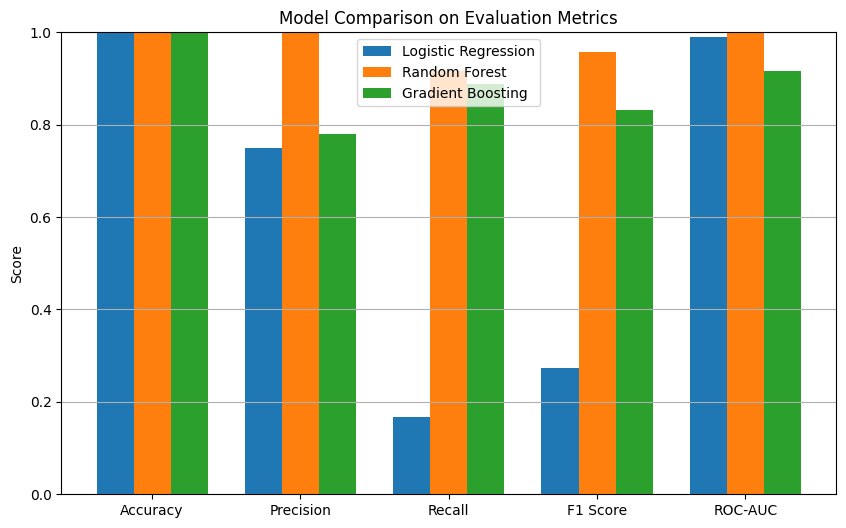

In [25]:
import numpy as np
import matplotlib.pyplot as plt

metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC-AUC']

# Calculate metrics for each model
scores_lr = [
    accuracy_score(y_test, model.predict(X_test)),
    precision_score(y_test, model.predict(X_test)),
    recall_score(y_test, model.predict(X_test)),
    f1_score(y_test, model.predict(X_test)),
    roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
]

scores_rf = [
    accuracy_score(y_test, rf_model.predict(X_test)),
    precision_score(y_test, rf_model.predict(X_test)),
    recall_score(y_test, rf_model.predict(X_test)),
    f1_score(y_test, rf_model.predict(X_test)),
    roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])
]

scores_gbm = [
    accuracy_score(y_test, gbm_model.predict(X_test)),
    precision_score(y_test, gbm_model.predict(X_test)),
    recall_score(y_test, gbm_model.predict(X_test)),
    f1_score(y_test, gbm_model.predict(X_test)),
    roc_auc_score(y_test, gbm_model.predict_proba(X_test)[:, 1])
]

x = np.arange(len(metrics))
width = 0.25

plt.figure(figsize=(10,6))
plt.bar(x - width, scores_lr, width, label='Logistic Regression')
plt.bar(x, scores_rf, width, label='Random Forest')
plt.bar(x + width, scores_gbm, width, label='Gradient Boosting')

plt.ylabel('Score')
plt.title('Model Comparison on Evaluation Metrics')
plt.xticks(x, metrics)
plt.ylim(0, 1)
plt.legend()
plt.grid(axis='y')
plt.show()


Log Model and Metrics with MLflow

In [26]:
import pandas as pd
from scipy.sparse import issparse
from mlflow.models.signature import infer_signature
import mlflow.sklearn

# Prepare input example
if issparse(X_test):
    input_example = pd.DataFrame(X_test[:5].todense())
else:
    input_example = pd.DataFrame(X_test[:5])

# Convert integer columns in input_example to float64 to avoid missing value issues
int_cols = input_example.select_dtypes(include=['int']).columns
input_example[int_cols] = input_example[int_cols].astype('float64')

# Prepare training data for signature inference - convert integer columns to float64 as well
X_train_for_signature = X_train.copy()
int_cols_train = X_train_for_signature.select_dtypes(include=['int']).columns
X_train_for_signature[int_cols_train] = X_train_for_signature[int_cols_train].astype('float64')

# Generate model signature
signature = infer_signature(X_train_for_signature, model.predict(X_train_for_signature))

# Log model with MLflow using 'name' instead of deprecated 'artifact_path'
mlflow.sklearn.log_model(
    model,
    name="logistic_model",
    input_example=input_example,
    signature=signature
)
